In [9]:
# Import packages
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [10]:
# Load data
# There are 761 polygons, the last cell will take a few minutes to run
neighbourhoods = gpd.read_file("../shapefiles/OttawaDA_nearHospital/DA_nearHospital.shp")
neighbourhoods.head()

,FID,OBJECTID,DAUID,DACODE,ADAUID,ADACODE,CTUID,CTNAME,CTCODE,CSDUID,...,DA_IR_2016,POPDENSQKM,POP_2016,TOT_DWELL,OCCUPYDWEL,SHAPE_AREA,SHAPE_LEN,Shape__Are,Shape__Len,geometry
0,1,870,35060467,0467,35060147,0147,5050133.00,0133.00,0912,3506008,...,F,1825.5,751,230,222,411415.736854,2805.863730,8.329520e+05,3992.945025,"POLYGON ((-75.75582 45.35092, -75.75309 45.348..."
1,2,871,35060468,0468,35060147,0147,5050133.00,0133.00,0912,3506008,...,F,1358.5,756,306,267,556450.794920,4296.336892,1.126800e+06,6113.167211,"POLYGON ((-75.74546 45.35233, -75.74768 45.351..."
2,3,872,35060469,0469,35060147,0147,5050133.00,0133.00,0912,3506008,...,F,15520.4,835,527,404,53812.063451,1001.817397,1.089756e+05,1425.718008,"POLYGON ((-75.75225 45.35312, -75.75242 45.353..."
3,4,873,35060471,0471,35060066,0066,5050023.01,0023.01,1182,3506008,...,F,3442.4,631,258,255,183277.475812,1908.260159,3.712089e+05,2716.894090,"POLYGON ((-75.75559 45.35955, -75.75543 45.359..."
4,5,895,35060500,0500,35060146,0146,5050135.03,0135.03,3227,3506008,...,F,1807.5,417,177,170,230781.327461,3036.703811,4.669546e+05,4318.914118,"POLYGON ((-75.75178 45.33149, -75.75141 45.330..."


In [11]:
# Load data
hospitals = gpd.read_file("../shapefiles/OttawaHospitals/Hospitals.shp")
hospitals.head()

,OBJECTID,ID,NAME,ADDRESS,PHONE,LINK_LABEL,LINK_EN,LINK_DESCR,LINK_LAB_1,LINK_FR,GLOBALID,ADDRESS_FR,NAME_FR,geometry
0,1,1,Royal Ottawa Hospital,1145 Carling Avenue,722-6521,None,http://www.theroyal.ca/,None,None,http://www.leroyal.ca/,{E279DD71-C8D3-4C76-B317-1ACF4DB9281A},"1145, avenue Carling",HÃ´pital Royal Ottawa,POINT Z (-75.73236 45.38809 0.00000)
1,2,2,Ottawa Hospital - Civic Campus,1053 Carling Avenue,761-4000,None,https://www.ottawahospital.on.ca/,None,None,https://www.ottawahospital.on.ca/,{C1661EEA-B6C5-4C11-9789-E5353940777A},"1053, avenue Carling",HÃ´pital dâOttawa â Campus Civic,POINT Z (-75.72121 45.39267 0.00000)
2,3,3,Ottawa Hospital - Riverside Campus,1967 Riverside Drive,738-7100,None,https://www.ottawahospital.on.ca/,None,None,https://www.ottawahospital.on.ca/,{7A30AEC4-D042-41D6-9CF1-D06F6202137F},"1967, promenade Riverside","HÃ´pital dâOttawa, campus Riverside",POINT Z (-75.66794 45.39675 0.00000)
3,4,4,Children's Hospital of Eastern Ontario,401 Smyth Road,737-7600,None,http://www.cheo.on.ca/,None,None,http://www.cheo.on.ca/fr/home,{93E3EACA-FB11-49E9-A914-0D5E8B5CBF7B},"401, chemin Smyth",Centre hospitalier pour enfants de l'est de l'Ont,POINT Z (-75.65192 45.40102 0.00000)
4,5,5,Ottawa Hospital - General Campus,501 Smyth Road,737-7777,None,https://www.ottawahospital.on.ca/,None,None,https://www.ottawahospital.on.ca/,{CC861544-A63C-4A64-89DA-65BC7274827E},"501, chemin Smyth",HÃ´pital dâOttawa â Campus GÃ©nÃ©ral,POINT Z (-75.64764 45.40099 0.00000)


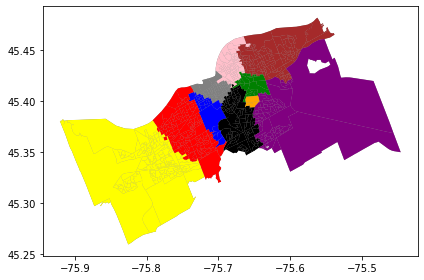

In [12]:
# Quick brute force approach. Not the most efficient code, but it gets the job done...
# May take a few minutes to run
closest_hospitals = []

# Check each neighbourhood
for n in neighbourhoods.DAUID:
    # Set the closest distance to -1
    closest = -1;
    # Closest hospital is an empty string
    close_h = ""
    
    # Best to use this CRS when dealing with distance
    nx = neighbourhoods[neighbourhoods.DAUID == n].to_crs(epsg=3857)
    
    # Find the center of the polygon 
    n_lon = nx.geometry.centroid.x.iloc[0]
    n_lat = nx.geometry.centroid.y.iloc[0]
    
    # Save the coordinates into a GeoSeries
    nx = gpd.GeoSeries([Point(n_lon, n_lat)])
            
    # Check each hospital
    for h in hospitals.NAME:

        # Best to use this CRS when dealing with distance
        hx = hospitals[hospitals.NAME == h].to_crs(epsg=3857)
        
        # Find the center of the polygon 
        h_lon = hx.geometry.centroid.x.iloc[0]
        h_lat = hx.geometry.centroid.y.iloc[0]
        
        # Save the coordinates into a GeoSeries
        hx = gpd.GeoSeries([Point(h_lon, h_lat)])

        # Calculate the distance between the hospital and the neighbourhood     
        dist = hx.distance(nx) # Distance will be in meters
        
        # Find the closest distance
        if(closest <= 0 or dist[0] <= closest):
            closest = dist[0] # New closest distance
            closest_h = h # New closest hospital

    # Save the data [ONS polygon, closest hospital, distance in km]       
    closest_hospitals.append([n, closest_h, round(closest/1000, 2)])

h = {hospitals.NAME[0]: 'red', # Royal Ottawa Hospital
     hospitals.NAME[1]: 'blue', # Ottawa Hospital - Civic Campus
     hospitals.NAME[2]: 'black', # Ottawa Hospital - Riverside Campus
     hospitals.NAME[3]: 'orange', # CHEO
     hospitals.NAME[4]: 'purple', # Ottawa Hospital - General Campus
     hospitals.NAME[5]: 'brown', # Montfort Hospital
     hospitals.NAME[6]: 'yellow', # Queensway-Carleton Hospital
     hospitals.NAME[7]: 'green', # Rehab Center
     hospitals.NAME[8]: 'gray', # Saint Vincent Hospital
     hospitals.NAME[9]: 'pink'} # Elizabeth Bruyere Hospital

fig, ax = plt.subplots()
neighbourhoods.plot(ax=ax, facecolor='gray');
# Color the polygoons based on the hospital in them
for ch in closest_hospitals:
    nx = neighbourhoods[neighbourhoods.DAUID == ch[0]]
    nx.plot(ax=ax, facecolor=h[ch[1]])
plt.tight_layout();